In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import joblib
# from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR, SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
from sklearn.base import clone
from itertools import product
from IPython.display import clear_output
import fileinput

In [3]:
# Leemmos los archivos CSV y creamos los DataFrames
# df_data = pd.read_csv('data/coded_auto_selection_data_race_final_position.csv') 
# df_test = pd.read_csv('data/test_auto_selection_data_race_final_position.csv') 
X = pd.read_csv('dataAdjust/DecisionTreeRegressor_auto_racetargetX.csv') 
Y = pd.read_csv('dataAdjust/DecisionTreeRegressor_auto_racetargetY.csv') 
X_t = pd.read_csv('dataAdjust/DecisionTreeRegressor_auto_racetargetXt.csv') 
Y_t = pd.read_csv('dataAdjust/DecisionTreeRegressor_auto_racetargetYt.csv') 
# X = pd.read_csv('dataAdjust/RandomForestRegressor_auto_racetargetX.csv') 
# Y = pd.read_csv('dataAdjust/RandomForestRegressor_auto_racetargetY.csv') 
# X_t = pd.read_csv('dataAdjust/RandomForestRegressor_auto_racetargetXt.csv') 
# Y_t = pd.read_csv('dataAdjust/RandomForestRegressor_auto_racetargetYt.csv') 

In [3]:
# Definir los posibles valores de cada parámetro
model_dict_regression = {
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor()

}
model_params = {
    'DecisionTreeRegressor':    {  
                                    'criterion': ['friedman_mse', 'squared_error', 'poisson'], # 'absolute_error',
                                    'splitter': {"best", "random"},
                                    'max_depth': list(np.linspace(5, 50, 5, dtype=int)), #[16], # list(np.linspace(5, 50, 5, dtype=int)) + [None]
                                    'max_features' : ["sqrt", "log2", None] + list(np.linspace(0.1, 1, 10, dtype=float)), 
                                    'ccp_alpha' : [0.0],#list(np.linspace(0.0, 0.2, 3, dtype=float)), #[0.0, ],
                                    'min_samples_split' : [2, 5, 10], #list(np.linspace(1, 5, 5, dtype=int)),
                                    'min_samples_leaf' : [1, 2, 4], #list(np.linspace(2, 5, 5, dtype=int)), #'min_samples_leaf': 1, 'min_samples_split': 2
                                    # 'max_leaf_nodes' : [2, 5, 10], #list(np.linspace(2, 2000, 3, dtype=int)),
                                    # 'min_weight_fraction_leaf' : list(np.linspace(0.0, 0.1, 3, dtype=float)),
                                    # 'min_impurity_decrease': list(np.linspace(0.0, 0.1, 3, dtype=float))
                                },  
#{'criterion': 'friedman_mse', 'max_depth': 16, 'max_features': 98, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': True}	
    'RandomForestRegressor':    {   'criterion': ['friedman_mse', 'squared_error', 'poisson'], # 'absolute_error',
                                    'n_estimators': list(np.linspace(500, 2000, 4, dtype=int)),
                                    'max_depth': [16], #list(np.linspace(5, 50, 5, dtype=int)), #[16], # list(np.linspace(5, 50, 5, dtype=int)) + [None]
                                    'bootstrap' : [True],
                                    'oob_score' : [True],
                                    # 'max_samples' : list(np.linspace(10, 100, 5, dtype=int)),
                                    # 'random_state' : list(np.linspace(5, 15, 3, dtype=int)),
                                    'max_features' : ["sqrt", "log2", None] + list(np.linspace(0.6, 1, 4, dtype=float)), 
                                    'warm_start' : [True, False],
                                    'ccp_alpha' : [0.0],
                                    # 'verbose' : list(np.linspace(0, 5, 3, dtype=int)),
                                    'min_samples_split' : [2, 5, 10], #list(np.linspace(1, 5, 5, dtype=int)),
                                    'min_samples_leaf' : [1, 2, 4], #list(np.linspace(2, 5, 5, dtype=int)), #'min_samples_leaf': 1, 'min_samples_split': 2
                                    # 'max_leaf_nodes' : [2, 5, 10], #list(np.linspace(2, 2000, 3, dtype=int)),
                                    # '' : [True, False],
                                    'n_jobs':[-1]
                                }
}

In [4]:
print(model_params['RandomForestRegressor'].__len__())

11


In [5]:
# Crear el diccionario de modelos con las combinaciones de parámetros
model_dict_regression_with_params = {}
for model in model_params:
    # Crear todas las combinaciones de parámetros
    params_values = model_params[model].values()

    # Generar todas las combinaciones posibles
    param_combinations = product(*params_values)

    for num, params_i in enumerate(param_combinations):
        params = {}
        for indice, key in enumerate(model_params[model].keys()):
            params[key] = params_i[indice]
        # Duplicar el modelo
        model_regression = clone(model_dict_regression[model])
        # print(params)
        model_regression.set_params(**params)
        model_dict_regression_with_params[f'{model}_{num}'] = model_regression
        # print(f'{model} with {params}')
        # print(model_regression.get_params())

dict_variables_objetivo = {
    'race_final_position' : model_dict_regression_with_params.keys()#, #model_dict_regression, 
    # 'race_finish': , 
    # 'race_winner': model_dict_classifier
}

In [6]:
print(model_dict_regression_with_params.__len__())

5022


In [9]:
print(list(np.linspace(5, 50, 5, dtype=int)))

[5, 16, 27, 38, 50]


In [11]:
model_score = {}
model_score_malo = {}

In [8]:
# Obtener la máxima puntuación del diccionario
maxima_puntuacion = max(model_score_malo.values(), key=lambda x: x[0])[0]
print("malo " + str(maxima_puntuacion))
maxima_puntuacion = max(model_score.values(), key=lambda x: x[0])[0]
print("bueno " + str(maxima_puntuacion))

ValueError: max() arg is an empty sequence

In [12]:

variables_a_eleiminar = ['race_final_position', 'race_finish', 'race_status', 'race_winner', 'race_points_won']
for variable_objetivo in dict_variables_objetivo.keys():
    # # Eliminamos las variables objetivo del DataFrame
    # X = df_data.drop(variables_a_eleiminar, axis=1)  
    # # Guardamos las variables a predecir
    # y = df_data[variable_objetivo].values
    # df_test_obj = df_test[variable_objetivo].values

    # df_test_pred = df_test.drop(variables_a_eleiminar, axis=1)

    # # Dividimos los datos en conjuntos de entrenamiento y prueba
    # ts = 0.3
    # rs = 11
    # # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    # X_train = X
    # y_train = y.ravel()
    for model_name in dict_variables_objetivo[variable_objetivo]:
        clear_output(wait=True)
        # Construimos y entrenamos el modelo con las características seleccionadas
        model = model_dict_regression_with_params[model_name] #max_iter=1000
        model_features = f"{model_name} target={variable_objetivo} test_size={ts} random_state={rs},params= {model.get_params()}"

        print(f'Iniciando enternamiento con modelo: {model_features}...')
        inicio = time.time() 
        # model.fit(X_train, y_train)
        model.fit(X, Y)
        fin = time.time() 
        print("... enternamiento completado.")
        tiempo_ejecucion = fin - inicio  
        print(f"Tiempo de ejecución: {tiempo_ejecucion:.2f} segundos")

        # Evaluamos el modelo con el conjunto de prueba
        print("Iniciando evaluación...")
        # accuracy = model.score(df_test_pred, df_test_obj) # (X_test, y_test)
        accuracy = model.score(X_t, Y_t) # (X_test, y_test)
        print("... evaluación completada.")
        print(f"Accuracy: {accuracy:.2f}")

        model_score[f'{model_name}'] = [accuracy, model.get_params(), tiempo_ejecucion]

        # # Guardamos el modelo entrenado
        # joblib.dump(model, f'../app/train_models/trained_model_{model_name}_{i}.pkl')

        # Nombre del archivo de texto
        nombre_archivo = "resultados_wit_params2.txt"

        # Abrir el archivo en modo de escritura agregada
        with open(nombre_archivo, "a") as archivo:
            # Escribir la información en el archivo
            archivo.write(f"Modelo: {model_features}\t\n")
            archivo.write(f"\tAccuracy: {accuracy}\n")
            archivo.write("-" * 20 + "\n")  # Separador de resultados
    

Iniciando enternamiento con modelo: RandomForestRegressor_158 target=race_final_position test_size=0.3 random_state=11,params= {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 16, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}...


C:\Users\franm\AppData\Local\Temp\ipykernel_15344\619106700.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, Y)


KeyboardInterrupt: 

In [13]:
# Obtener la máxima puntuación del diccionario
maxima_puntuacion = max(model_score.values(), key=lambda x: x[0])
print(maxima_puntuacion)
# bueno 0.46143863171581057
# dict_bueno = [0.46143863171581057, {'ccp_alpha': 0.0, 'criterion': 'poisson', 'max_depth': 5, 'max_features': 0.5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}, 0.08182525634765625]
# ramm_bueno = [0.4569279407135267, {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 16, 'max_features': 0.6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': True}, 31.325207233428955
#  'DecisionTreeRegressor_1510': [0.7023443571874328, {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 27, 'max_features': 0.9, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}, 0.2677452564239502], 
#  'DecisionTreeRegressor_1539': [0.7049058767139202, {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 38, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}, 0.38211679458618164]}

[0.4569279407135267, {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 16, 'max_features': 0.6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': True}, 31.325207233428955]


In [18]:
dict_final = {
    'DecisionTreeRegressor_manual': 0.1,
    'DecisionTreeRegressor_RFE': -0.1,
    'DecisionTreeRegressor_set_REF': 0.46143863,
    'RandomForestRegressor_manual': 0.4192,
    'RandomForestRegressor_set_REF': 0.433310,
    'RandomForestRegressor_RFE': 0.4195
}

In [36]:
model = RandomForestRegressor()
params = {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 16, 'max_features': 0.6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': True}
# model = DecisionTreeRegressor()
# params = {'ccp_alpha': 0.0, 'criterion': 'poisson', 'max_depth': 5, 'max_features': 0.5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
model.set_params(**params)
print(f'Iniciando enternamiento con modelo: ...')
inicio = time.time() 
# model.fit(X_train, y_train)
model.fit(X, Y)
fin = time.time() 
print("... enternamiento completado.")
tiempo_ejecucion = fin - inicio  
print(f"Tiempo de ejecución: {tiempo_ejecucion:.2f} segundos")

# Evaluamos el modelo con el conjunto de prueba
print("Iniciando evaluación...")
# accuracy = model.score(df_test_pred, df_test_obj) # (X_test, y_test)
accuracy = model.score(X_t, Y_t) # (X_test, y_test)
print("... evaluación completada.")
print(f"Accuracy: {accuracy:.2f}")

# Guardamos el modelo entrenado
joblib.dump(model, f'../app3/trained_model_race_pos3.pkl')

Iniciando enternamiento con modelo: ...


C:\Users\franm\AppData\Local\Temp\ipykernel_23844\1070679915.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, Y)


... enternamiento completado.
Tiempo de ejecución: 20.14 segundos
Iniciando evaluación...
... evaluación completada.
Accuracy: 0.46


['../app3/trained_model_race_pos3.pkl']

In [37]:
dict_final = {
    'DecisionTreeRegressor_manual': -0.12,
    'DecisionTreeRegressor_RFE': -0.13,
    'DecisionTreeRegressor_set_REF': 0.45692,
    'RandomForestRegressor_manual': 0.4112,
    'RandomForestRegressor_set_REF': 0.461438,
    'RandomForestRegressor_RFE': 0.4195
}

***Gráficos de evalución***

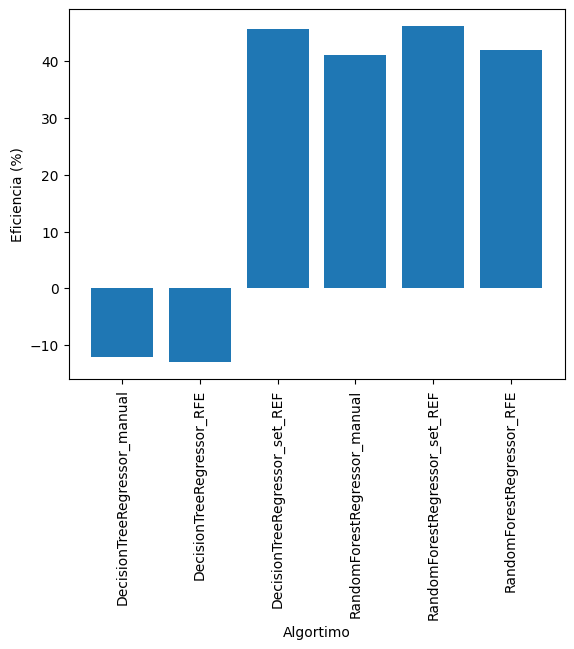

In [38]:
# for target in model_score.keys():
# diccionario_ordenado = dict(sorted(variable_obj_models_score[target].items(), key=lambda x: x[0]))
keys = dict_final.keys()
# keys = [palabra.replace('auto_race', 'RFE') for palabra in keys]
# keys = [palabra.replace('auto_winner', 'RFE') for palabra in keys]
# keys = [palabra.replace('auto_pole', 'RFE') for palabra in keys]
values = [item*100 for item in dict_final.values()]

# Crear el gráfico de barras
plt.bar(keys, values)

# Personalizar el gráfico
plt.xlabel('Algortimo')
plt.ylabel('Eficiencia (%)')
# plt.title(f'Eficiencia de los modelos para predecir {dict_target[target]}')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

***Gráficos de tiempos de ejecución***